<a href="https://colab.research.google.com/github/Lithikhaa/Decision_Tree/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

<function matplotlib.pyplot.show(*args, **kw)>

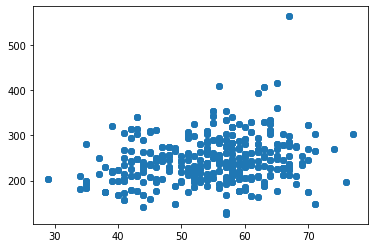

In [ ]:
x = df.age
y = df.chol
plt.scatter(x,y)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

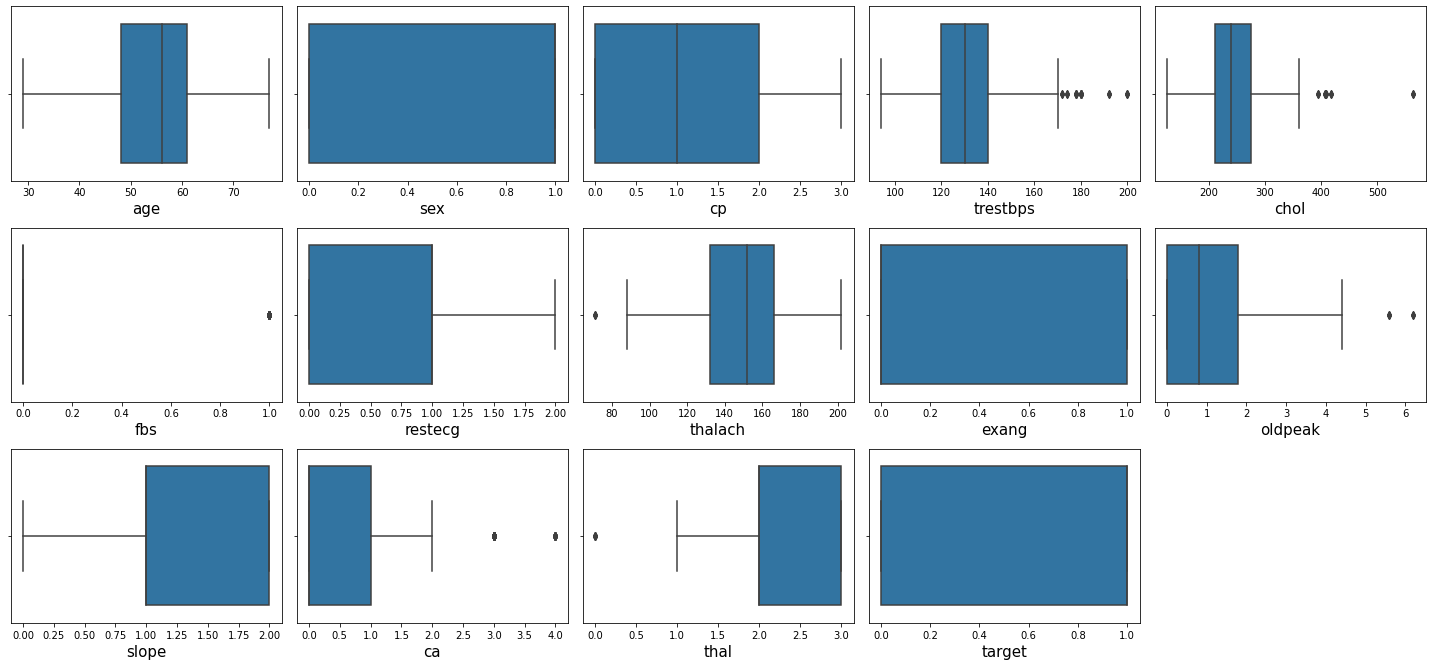

In [ ]:
plt.figure(figsize = (20,15))
plotnumber = 1
for col in df.columns:
  if plotnumber <=14:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize = 15)
  plotnumber +=1
plt.tight_layout()
plt.show()

In [ ]:
x = df.drop('target', axis =1)
y = df['target']


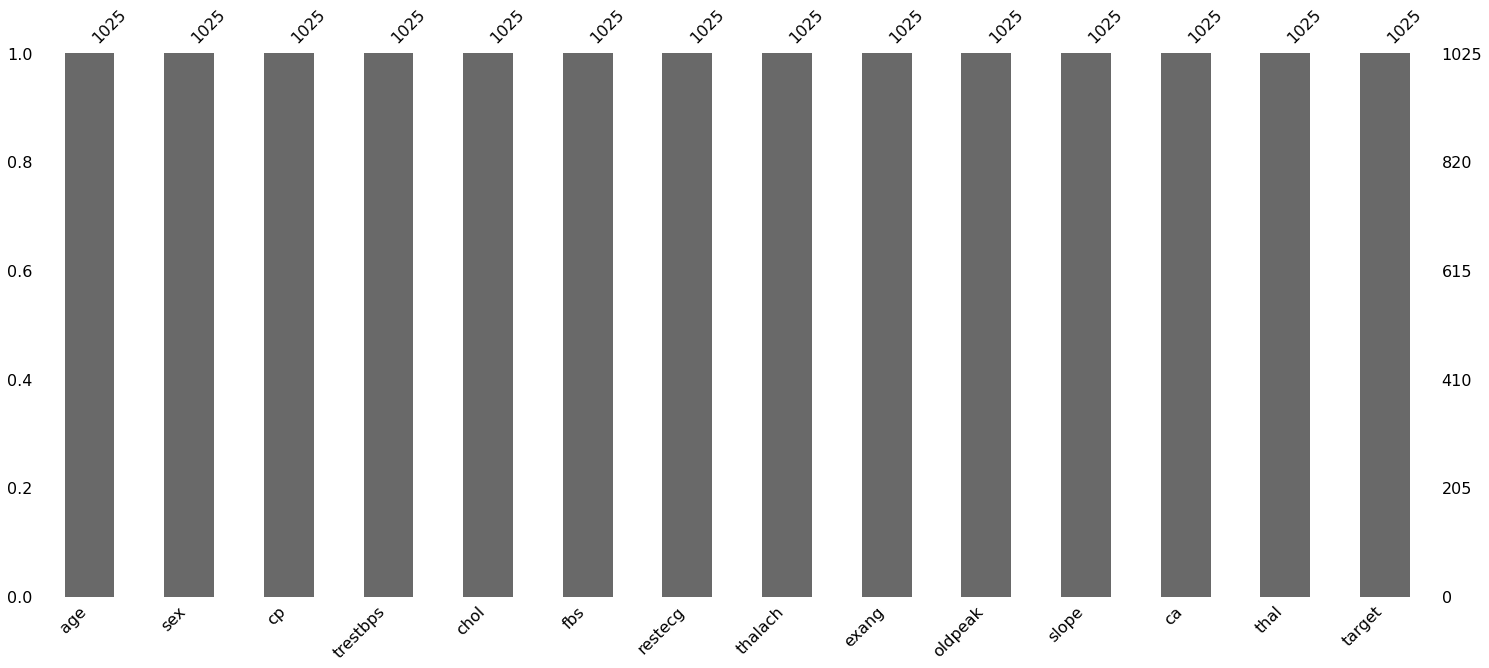

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split (x,y,test_size = 0.5, random_state=5)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion ="gini",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(x_test)


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[246,   9],
       [  6, 252]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9707602339181286

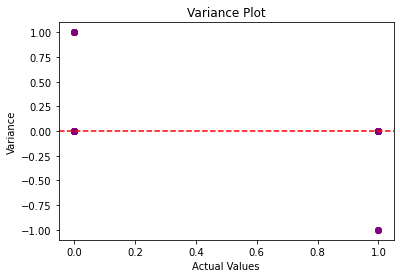

In [ ]:
variance = y_pred - y_test
fig, ax = plt.subplots()
ax.scatter(y_test, variance, color='purple', alpha=0.5)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Variance')
ax.set_title('Variance Plot')
plt.show()

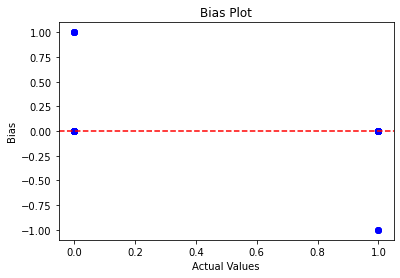

In [ ]:
bias = y_pred - y_test
fig, ax = plt.subplots()
ax.scatter(y_test, bias, color='blue', alpha=0.5)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Bias')
ax.set_title('Bias Plot')
plt.show()